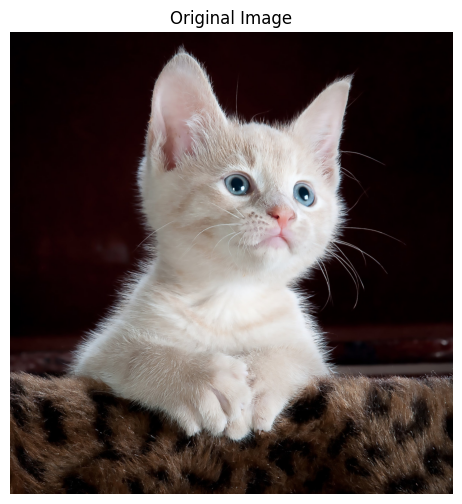

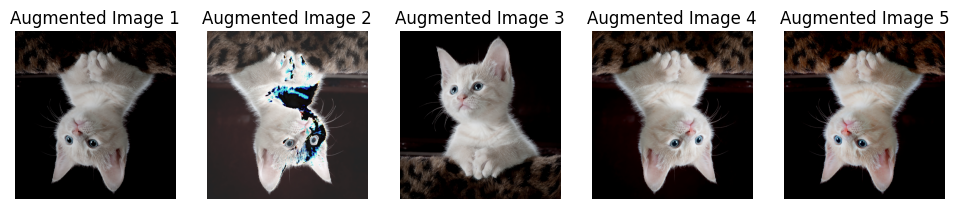

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image_path = 'cat.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Original image
show_images([original_image], ['Original Image'])

# Data augmentation functions
def random_flip(image):
    return cv2.flip(image, np.random.randint(-1, 2))

def random_brightness(image, max_delta=50):
    delta = np.random.randint(-max_delta, max_delta+1)
    return np.clip(image + delta, 0, 255).astype(np.uint8)

def random_contrast(image, min_alpha=0.5, max_alpha=1.5):
    alpha = np.random.uniform(min_alpha, max_alpha)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = np.expand_dims(gray, axis=2)
    return np.clip(alpha * image + (1 - alpha) * gray, 0, 255).astype(np.uint8)

# Augment the data
num_augmented_images = 5
augmented_images = []

for _ in range(num_augmented_images):
    augmented_image = original_image.copy()
    augmented_image = random_flip(augmented_image)
    augmented_image = random_brightness(augmented_image)
    augmented_image = random_contrast(augmented_image)
    augmented_images.append(augmented_image)

# Display augmented images
titles = [f'Augmented Image {i+1}' for i in range(num_augmented_images)]
show_images(augmented_images, titles)


In [12]:
import nltk
import random

# Sample sentences for demonstration
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A stitch in time saves nine.",
    "Actions speak louder than words.",
    "The early bird catches the worm.",
    "A penny saved is a penny earned."
]

# Function to perform data augmentation by synonym replacement
def synonym_replacement(sentence, n=1):
    words = nltk.word_tokenize(sentence)
    augmented_sentences = []

    for _ in range(n):
        augmented_words = words.copy()
        for i, word in enumerate(words):
            synsets = nltk.corpus.wordnet.synsets(word)
            if synsets:
                synonym = random.choice(synsets[0].lemma_names())
                augmented_words[i] = synonym
        augmented_sentence = ' '.join(augmented_words)
        augmented_sentences.append(augmented_sentence)

    return augmented_sentences

# Augment each sentence with one synonym replacement
for sentence in sentences:
    augmented_sentences = synonym_replacement(sentence, n=1)
    print("Original Sentence:", sentence)
    print("Augmented Sentences:")
    for augmented_sentence in augmented_sentences:
        print(augmented_sentence)
    print()


Original Sentence: The quick brown fox jumps over the lazy dog.
Augmented Sentences:
The quick brownness fox jump over the lazy dog .

Original Sentence: A stitch in time saves nine.
Augmented Sentences:
angstrom stitch inch time save niner .

Original Sentence: Actions speak louder than words.
Augmented Sentences:
action speak loud than words .

Original Sentence: The early bird catches the worm.
Augmented Sentences:
The early bird gimmick the worm .

Original Sentence: A penny saved is a penny earned.
Augmented Sentences:
angstrom penny salvage be A penny realize .


In [13]:
!pip install nlpaug


  Obtaining dependency information for nlpaug from https://files.pythonhosted.org/packages/1c/28/a799de8b713e7cf84214d48739d0343505ff0967f85055b82d65894e1d02/nlpaug-1.1.11-py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.2.0 from https://files.pythonhosted.org/packages/1c/f0/109cd56267214b2976cee47067f070ca280f13937df332595cd6430ef8ed/pandas-2.2.0-cp39-cp39-win_amd64.whl.metadata
  Using cached pandas-2.2.0-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for gdown>=4.0.0 from https://files.pythonhosted.org/packages/cb/56/f4845ed78723a4eb8eb22bcfcb46e1157a462c78c0a5ed318c68c98f9a79/gdown-5.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f082


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import nlpaug.augmenter.word as naw

# Sample sentence for augmentation
sentence = "The quick brown fox jumps over the lazy dog."

# Define augmentation method
aug = naw.SynonymAug(aug_src='wordnet')

# Augment the sentence
augmented_text = aug.augment(sentence)

# Print the original and augmented text
print("Original Sentence:", sentence)
print("Augmented Sentence:", augmented_text)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHAH\AppData\Roaming\nltk_data...


Original Sentence: The quick brown fox jumps over the lazy dog.
Augmented Sentence: ['The quick brown dodger jumps complete the otiose dog.']


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
